# 🧮 Problem 3: t Tests

## Objective
A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference 
d=0,0.1,0.2,…,1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.


## Activity

A type II error occurs when a test fails to reject the null hypothesis even though it is false.

I have considered two independent samples of size \( n = 100 \):

- Sample 1: drawn from \( \mathcal{N}(0, 1) \)
- Sample 2: drawn from \( \mathcal{N}(d, 1) \)

For each mean difference \( d = 0, 0.1, 0.2, \dots, 1.0 \), I have performed the following simulation 1,000 times:

1. Drew two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean \( d \) and standard deviation 1.
2. Ran an independent samples t-test on the two samples, at significance level \(\alpha = 0.05\).
3. Rejected the null hypothesis if the p-value is less than 0.05.
4. Recorded whether the null hypothesis is **not** rejected.

For each \( d \), I have computed the **proportion of times the null is not rejected**.  
For \( d > 0 \), this proportion estimated the **type II error rate** \( \beta(d) \).  
For \( d = 0 \), the null is true, so the proportion of non-rejections is approximately \( 1 - \alpha \approx 0.95 \) (this is not a type II error, but it's still informative to include in the plot).

I have then plot this proportion against \( d \) and interpreted how the type II error rate changed as the difference in means increases.


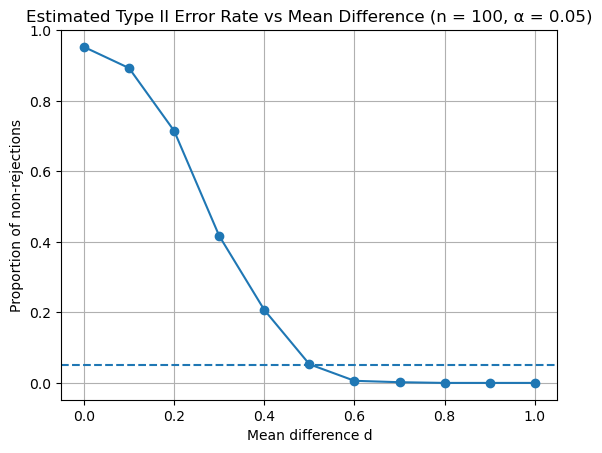

d = 0.0, proportion of non-rejections ≈ 0.953
d = 0.1, proportion of non-rejections ≈ 0.893
d = 0.2, proportion of non-rejections ≈ 0.715
d = 0.3, proportion of non-rejections ≈ 0.417
d = 0.4, proportion of non-rejections ≈ 0.207
d = 0.5, proportion of non-rejections ≈ 0.053
d = 0.6, proportion of non-rejections ≈ 0.006
d = 0.7, proportion of non-rejections ≈ 0.002
d = 0.8, proportion of non-rejections ≈ 0.000
d = 0.9, proportion of non-rejections ≈ 0.000
d = 1.0, proportion of non-rejections ≈ 0.000


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Reproducibility
rng = np.random.default_rng(12345)

# Parameters
n = 100            # sample size per group
n_sims = 1000      # number of simulations per d
alpha = 0.05       # significance level

# Effect sizes d from 0 to 1.0 in steps of 0.1
d_values = np.arange(0, 1.01, 0.1)

type2_rates = []   # proportion of times null is NOT rejected

for d in d_values:
    not_rejected_count = 0
    
    for _ in range(n_sims):
        # Sample 1: N(0, 1)
        sample1 = rng.normal(loc=0, scale=1, size=n)
        # Sample 2: N(d, 1)
        sample2 = rng.normal(loc=d, scale=1, size=n)
        
        # Independent samples t-test
        t_stat, p_value = ttest_ind(sample1, sample2, equal_var=True)
        
        # Fail to reject null if p >= alpha
        if p_value >= alpha:
            not_rejected_count += 1
    
    proportion_not_rejected = not_rejected_count / n_sims
    type2_rates.append(proportion_not_rejected)

# Convert to arrays for convenience
type2_rates = np.array(type2_rates)

# Plot
plt.plot(d_values, type2_rates, marker="o")
plt.axhline(0.05, linestyle="--")  # reference line for alpha
plt.xlabel("Mean difference d")
plt.ylabel("Proportion of non-rejections")
plt.title("Estimated Type II Error Rate vs Mean Difference (n = 100, α = 0.05)")
plt.grid(True)
plt.show()

# Print a small table of values
for d, beta_hat in zip(d_values, type2_rates):
    print(f"d = {d:.1f}, proportion of non-rejections ≈ {beta_hat:.3f}")


## Interpretation of the Results

The plot has shown the proportion of times the null hypothesis is **not** rejected as a function of the mean difference \( d \).

- At \( d = 0 \):  
  The null hypothesis is true.  
  The proportion of non-rejections is therefore approximately \( 1 - \alpha \approx 0.95 \), which matches what I expected: we only reject about 5% of the time when the null is true (type I error rate).

- For \( d > 0 \):  
  The null hypothesis is false, so **failing to reject** it corresponds to a **type II error**.  
  The plotted value for each \( d > 0 \) is an estimate of the type II error rate \( \beta(d) \).

As the mean difference \( d \) increases from 0 toward 1:

- The two distributions (for the two groups) become more separated.
- The t-test gains **power** (it becomes easier to detect the difference).
- Consequently, the probability of failing to reject the null hypothesis (type II error rate) **decreases**.

In the simulation, I have seen:

- For small effect sizes (e.g., \( d = 0.1 \)), the proportion of non-rejections is still quite high: the test often fails to detect such a small difference with \( n = 100 \).
- As \( d \) reaches moderate values (e.g., \( d = 0.5 \)), the proportion of non-rejections drops noticeably: the test is now detecting the difference fairly often.
- For large effect sizes (e.g., \( d \approx 1.0 \)), the proportion of non-rejections is close to 0: the test almost always rejects the null hypothesis when it is false, and the type II error rate is very low.

Overall, the simulation illustrates the key idea that:

> **As the true difference between population means increases, the type II error rate decreases and the power of the t-test increases.**


## Study References 

1. **“Student’s t-test.” *Wikipedia*.**  
   Overview of one-sample, two-sample, and paired t-tests with assumptions and examples.  
   https://en.wikipedia.org/wiki/Student%27s_t-test

2. **“scipy.stats.ttest_ind.”**
   Reference for the independent samples t-test used in the simulation.  
   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

3. **“NumPy Random Generator Documentation.” *NumPy Official Docs*.**  
   Reference for random sampling functions used in Monte Carlo simulations.  
   https://numpy.org/doc/stable/reference/random/index.html

4. **NumPy Random Sampling (used for simulations)**  
   Documentation for `numpy.random.Generator.normal` (drawing random samples).  
   https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html  
   Documentation for `numpy.random.Generator.permutation` (used for label shuffling in simulations).  
   https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.per

5. **SciPy Independent Samples t-test**  
   Documentation for `scipy.stats.ttest_ind`.  
   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

6. **Matplotlib Histogram Function (used for plotting distributions)**  
   Documentation for `matplotlib.pyplot.hist`.  
   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


